In [1]:
import GCRCatalogs

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gc = GCRCatalogs.load_catalog('protoDC2_test')

/global/common/software/lsst/common/miniconda/current/lib/python3.6/site-packages/GCRCatalogs/alphaq.py:114: UserWarning: No md5 sum specified in the config file
  warnings.warn('No md5 sum specified in the config file')


In [3]:
data = gc.get_quantities(['halo_mass', 'Mag_true_r_lsst_z0'], filters=['redshift < 0.25'])

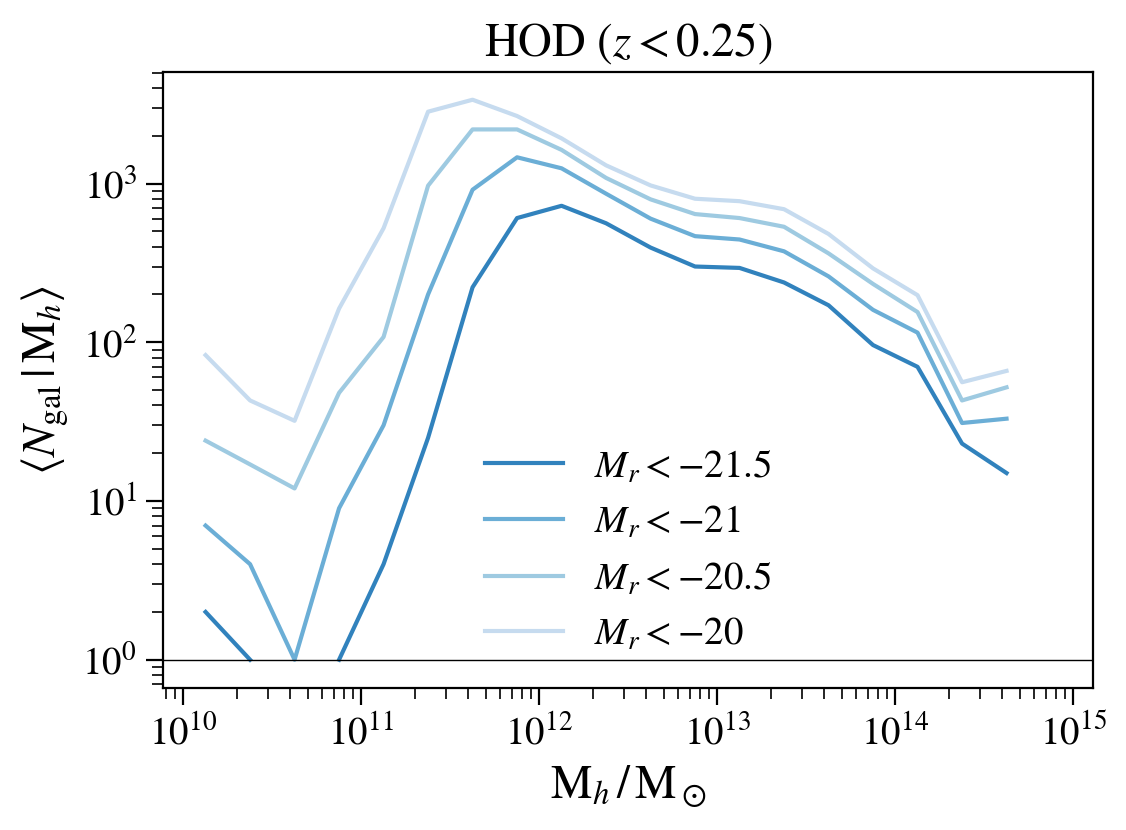

In [4]:
mass_bins = np.logspace(10, 15, 21)
mass_center = np.sqrt(mass_bins[1:] * mass_bins[:-1])

for Mr_thres, color in zip((-21.5, -21, -20.5, -20), plt.cm.tab20c.colors):
    plt.loglog(
        mass_center, 
        np.histogram(data['halo_mass'][data['Mag_true_r_lsst_z0'] < Mr_thres], mass_bins)[0],
        label=r'$M_r < {}$'.format(Mr_thres),
        c=color,
    );

plt.xlabel(r'${\rm M}_h \,/\, {\rm M}_\odot$');
plt.ylabel(r'$\langle N_{\rm gal} \,|\, {\rm M}_h \rangle$');
plt.title(r'HOD $(z < 0.25)$');
plt.axhline(1, lw=0.5, c='k');
plt.legend();